# **Weather Prediction**

---



## **Objective**

Determining if a set of weather measurements results in suitable conditions for an outdoor BBQ in a specific European city.


In [233]:
# Importing libraries for data manipulation and visualization

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting
%matplotlib inline


In [234]:
#Loading the Datset
df = pd.read_csv('/content/weather_prediction_dataset.csv')
df_bbq = pd.read_csv('/content/weather_prediction_bbq_labels.csv')

In [235]:
#Reviewing the datset
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6             2.7  ...                 0.5   
2              2.2             0.1  ...                -1.0   
3              3.9             0.5  ...                 2.5   
4              6.0             3.8  ...                -1.8   

   STOCKHOLM_temp_max  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
0                 0.7               1.6            0.97          1.0275   
1                 2.0               2.0            0.99          1.0293   
2                 2.8               3.4            0.91          1.0267   
3                 4.6               4.9            0.95          1.0222   
4                 2.9               3.6            0.95          1.0209   

   TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
0                    0.25                 0.04              8.5   
1                    0.17                 0.16              7.9   
2                    0.27                 0.00              8.1   
3                    0.11                 0.44              8.6   
4                    0.39                 0.04              8.0   

   TOURS_temp_min  TOURS_temp_max  
0             7.2             9.8  
1             6.6             9.2  
2             6.6             9.6  
3             6.4            10.8  
4             6.4             9.5  

[5 rows x 165 columns]

In [236]:
df_bbq.head()

DATE  BASEL_BBQ_weather  BUDAPEST_BBQ_weather  DE_BBQ_weather  \
0  20000101              False                 False           False   
1  20000102              False                 False           False   
2  20000103              False                 False           False   
3  20000104              False                 False           False   
4  20000105              False                 False           False   

   DRESDEN_BBQ_weather  DUSSELDORF_BBQ_weather  HEATHROW_BBQ_weather  \
0                False                   False                 False   
1                False                   False                 False   
2                False                   False                 False   
3                False                   False                 False   
4                False                   False                 False   

   KASSEL_BBQ_weather  LJUBLJANA_BBQ_weather  MAASTRICHT_BBQ_weather  \
0               False                  False                   False   
1               False                  False                   False   
2               False                  False                   False   
3               False                  False                   False   
4               False                  False                   False   

   MALMO_BBQ_weather  MONTELIMAR_BBQ_weather  MUENCHEN_BBQ_weather  \
0              False                   False                 False   
1              False                   False                 False   
2              False                   False                 False   
3              False                   False                 False   
4              False                   False                 False   

   OSLO_BBQ_weather  PERPIGNAN_BBQ_weather  SONNBLICK_BBQ_weather  \
0             False                  False                  False   
1             False                  False                  False   
2             False                  False                  False   
3             False                  False                  False   
4             False                  False                  False   

   STOCKHOLM_BBQ_weather  TOURS_BBQ_weather  
0                  False              False  
1                  False              False  
2                  False              False  
3                  False              False  
4                  False              False

For each of the 18 cities in Europe, there are 165 columns. A variety of data were recorded for each city, including wind speed, gust, cloud cover, humidity, pressure, global radiation, precipitation, sunshine, minimum and maximum temperatures.
Moreover, the collection of data differs from city to city (for instance, wind speed may be substituted for cloud cover in certain cities, or wind gust may be substituted for wind speed in others).



In [237]:
#cheking the column names and its size
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

In [238]:
df_bbq.columns

Index(['DATE', 'BASEL_BBQ_weather', 'BUDAPEST_BBQ_weather', 'DE_BBQ_weather',
       'DRESDEN_BBQ_weather', 'DUSSELDORF_BBQ_weather', 'HEATHROW_BBQ_weather',
       'KASSEL_BBQ_weather', 'LJUBLJANA_BBQ_weather', 'MAASTRICHT_BBQ_weather',
       'MALMO_BBQ_weather', 'MONTELIMAR_BBQ_weather', 'MUENCHEN_BBQ_weather',
       'OSLO_BBQ_weather', 'PERPIGNAN_BBQ_weather', 'SONNBLICK_BBQ_weather',
       'STOCKHOLM_BBQ_weather', 'TOURS_BBQ_weather'],
      dtype='object')

##Choose the city




In [239]:
# Get the city name from user input
city = input("Enter the city name: ").upper()

# Generate the column names dynamically based on the user input
city_columns = [col for col in df.columns if city.lower() in col.lower()]

# Check if any columns are found for the city
if not city_columns:
    print(f"No data available for {city}.")
else:
    # Select columns for the chosen city
    city_data = df[['DATE'] + city_columns]

    # Assign BBQ weather condition for the chosen city if available
    if f'{city}_BBQ_weather' in df_bbq.columns:
        city_data['BBQ'] = df_bbq[f'{city}_BBQ_weather']
    else:
        print(f"No BBQ weather data available for {city}.")

    # Display the DataFrame
    print(city_data.head())


Enter the city name: heathrow
       DATE  HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0  20000101                     7               0.94             1.0245   
1  20000102                     7               0.89             1.0253   
2  20000103                     8               0.91             1.0186   
3  20000104                     5               0.89             1.0148   
4  20000105                     5               0.85             1.0142   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_sunshine  \
0                       0.18                    0.00                0.4   
1                       0.20                    0.02                0.7   
2                       0.13                    0.60                0.0   
3                       0.34                    0.02                2.9   
4                       0.25                    0.08                1.3   

   HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max    BBQ  

<ipython-input-239-93d52ed7f74f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['BBQ'] = df_bbq[f'{city}_BBQ_weather']


In [240]:
print(city_data.head())

       DATE  HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0  20000101                     7               0.94             1.0245   
1  20000102                     7               0.89             1.0253   
2  20000103                     8               0.91             1.0186   
3  20000104                     5               0.89             1.0148   
4  20000105                     5               0.85             1.0142   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_sunshine  \
0                       0.18                    0.00                0.4   
1                       0.20                    0.02                0.7   
2                       0.13                    0.60                0.0   
3                       0.34                    0.02                2.9   
4                       0.25                    0.08                1.3   

   HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max    BBQ  
0                 7.0        

### **Data Visualization**

---



#### Pairplot

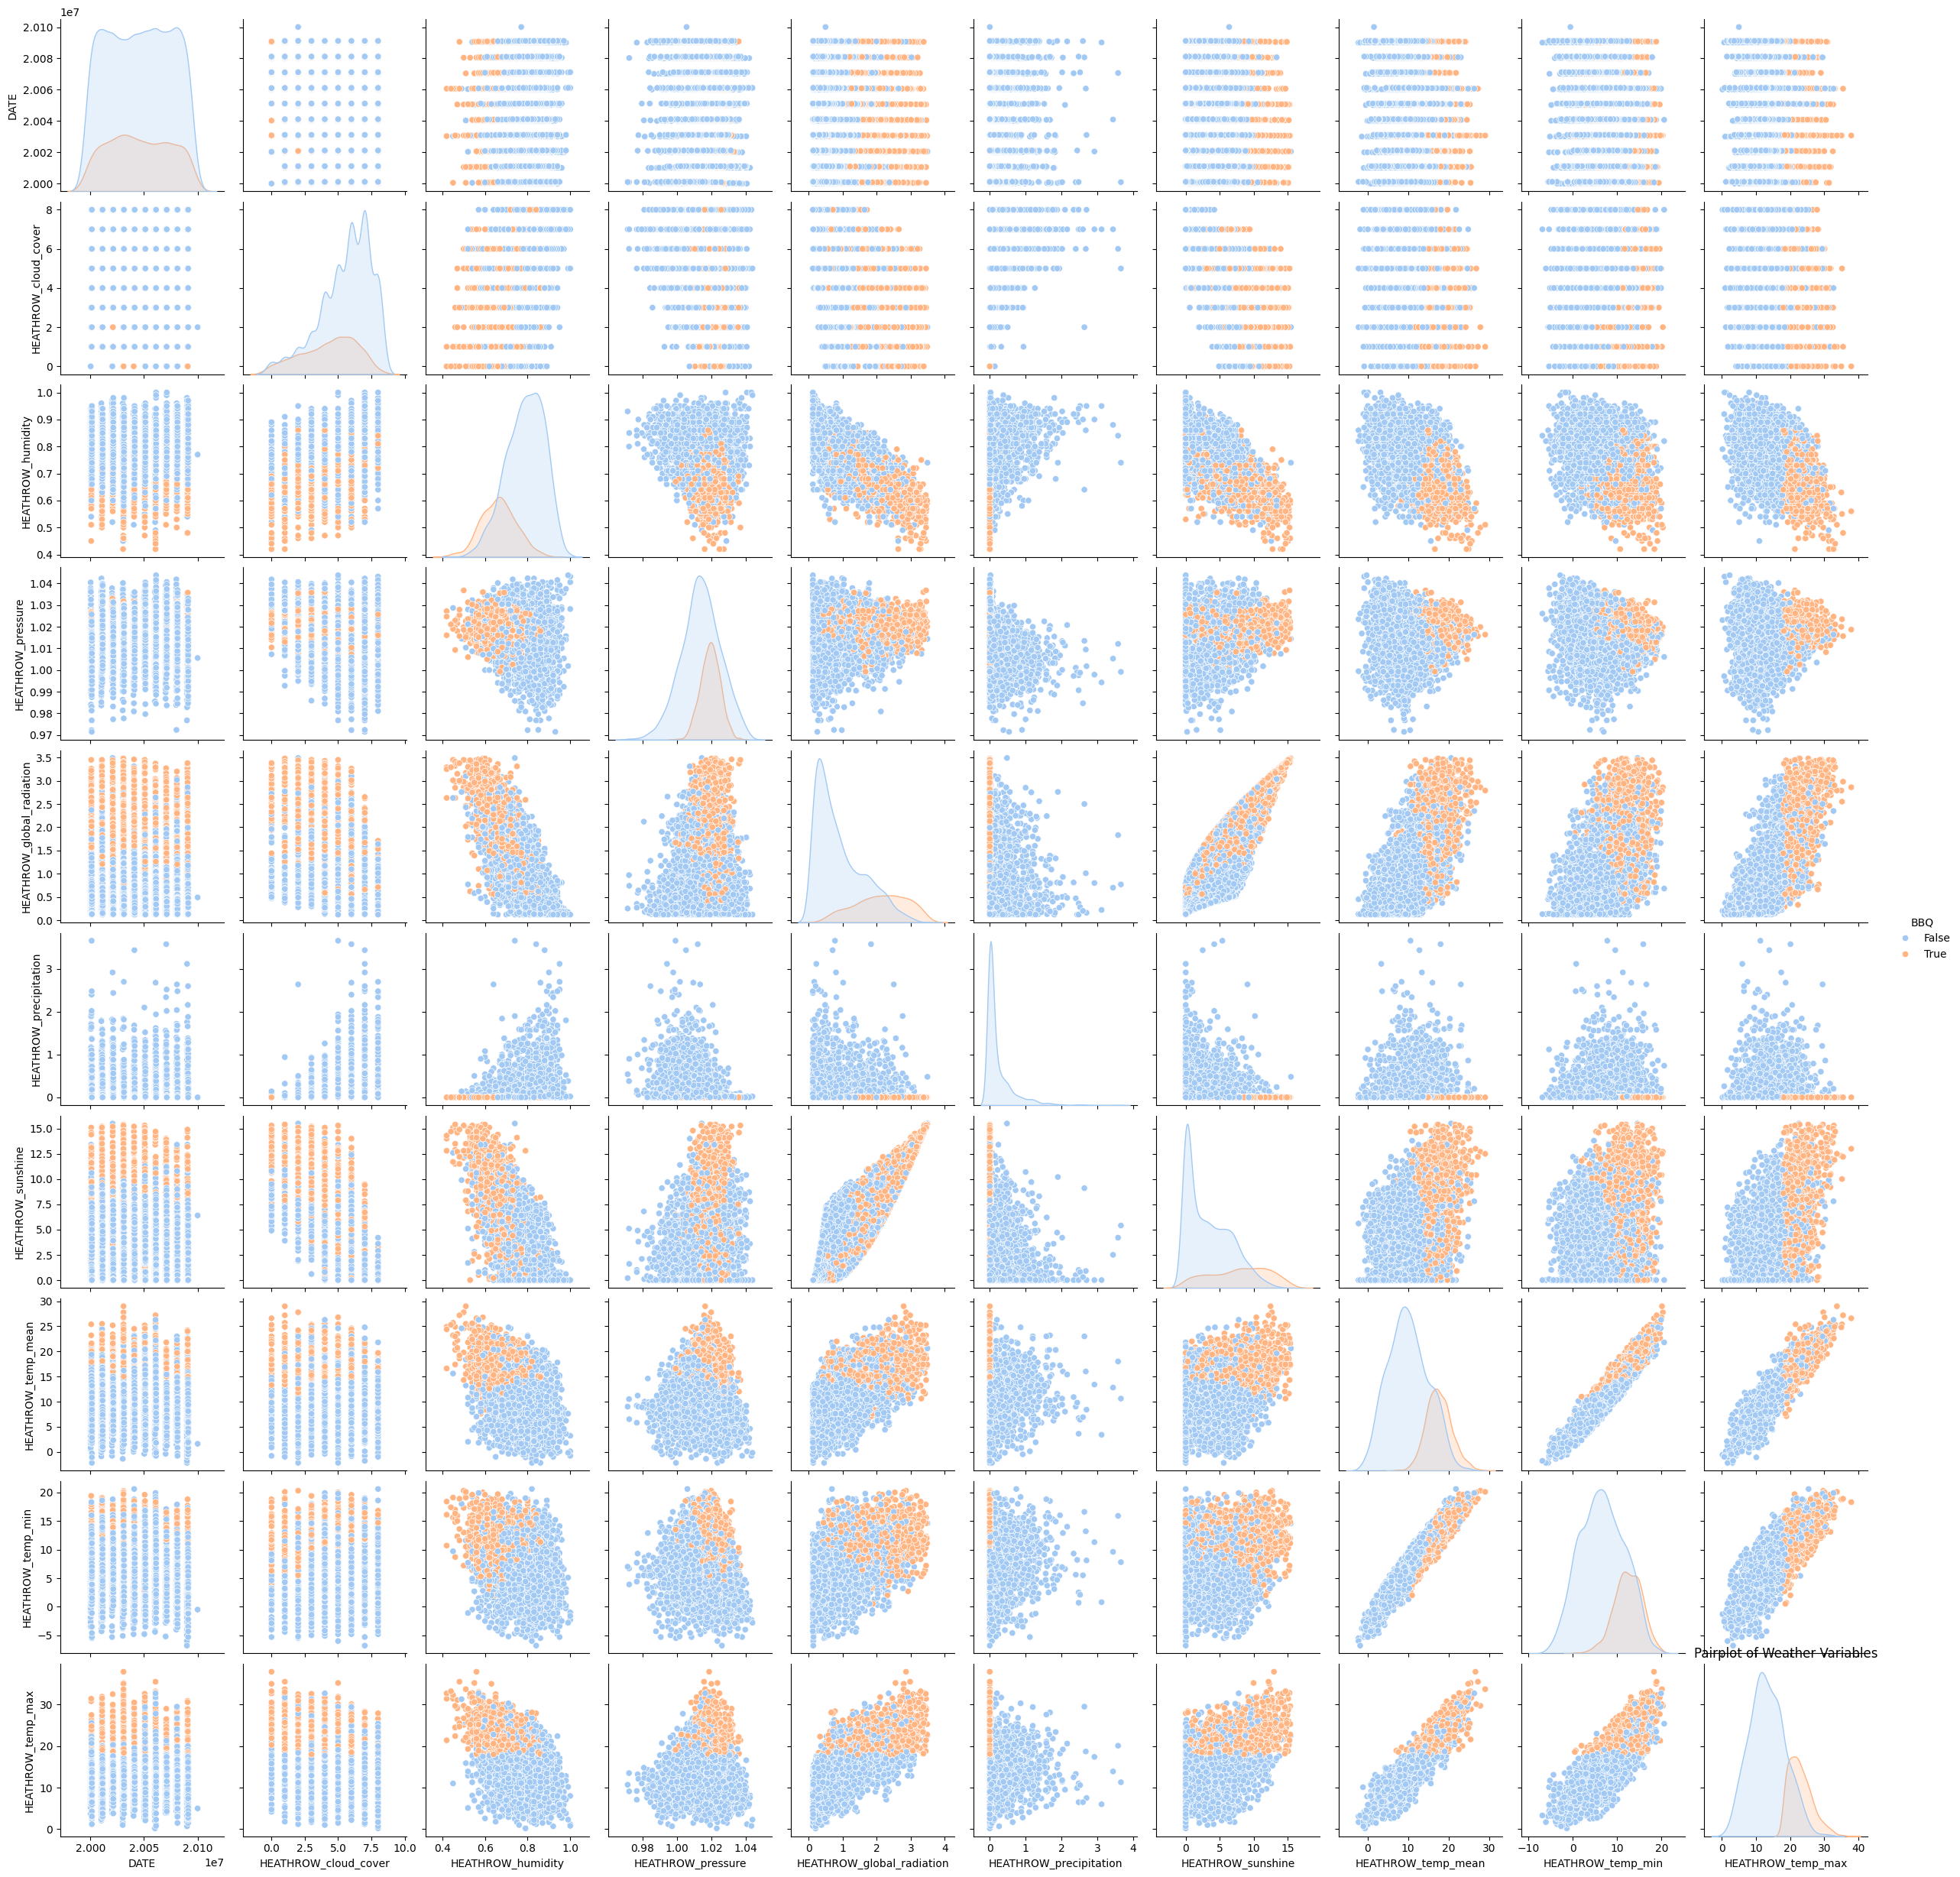

In [241]:
sns.pairplot(city_data, hue='BBQ', palette='pastel')
plt.title('Pairplot of Weather Variables')
plt.show()

#### Correlation Heatmap

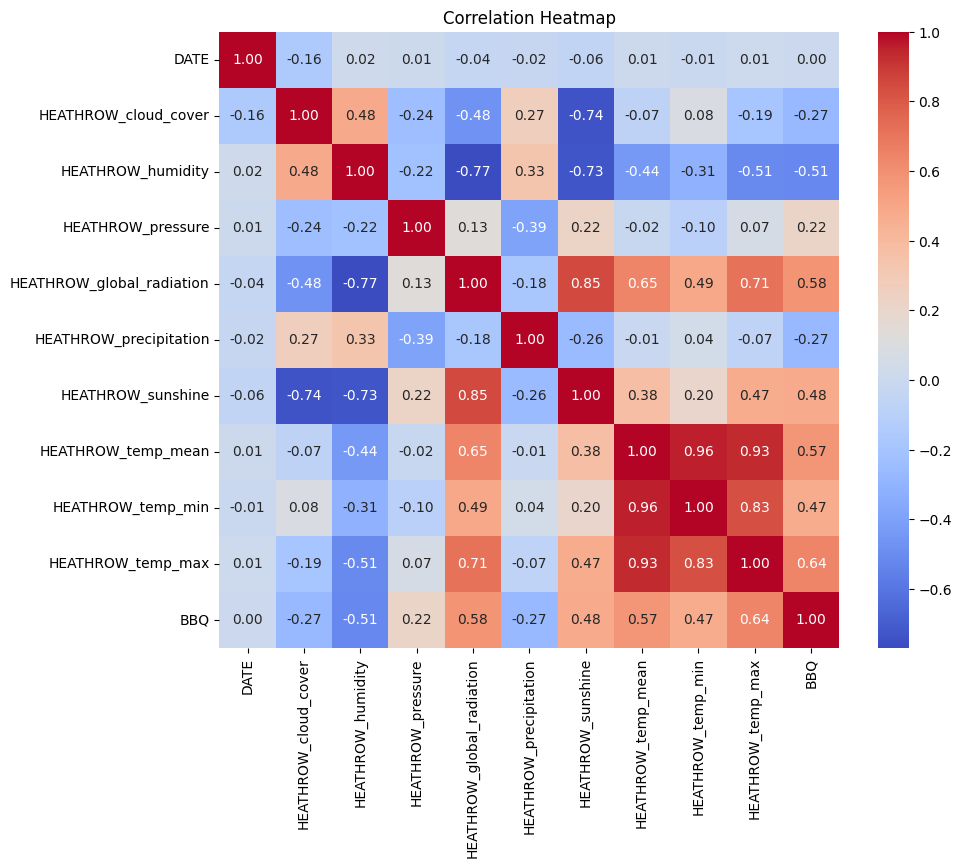

In [242]:
plt.figure(figsize=(10, 8))
sns.heatmap(city_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Subplots

In this section there is option for no data found as columnname might differ city to city.

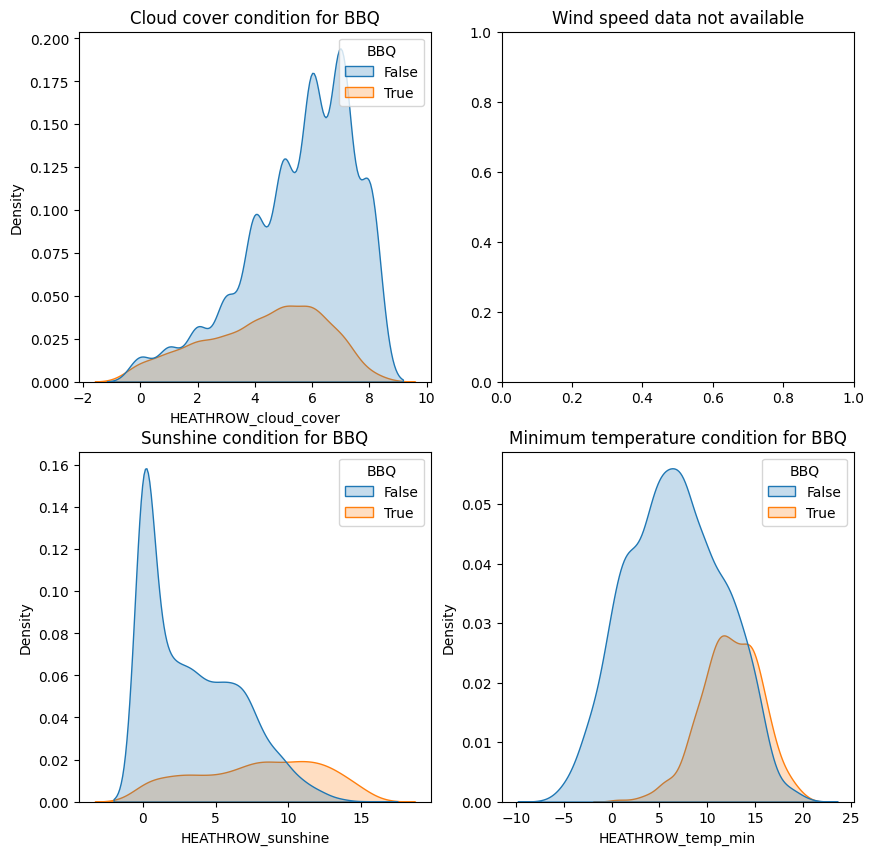

In [243]:
# Create subplots for KDE plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot Cloud cover condition for BBQ
cloud_cover_column = next((col for col in city_columns if 'cloud_cover' in col.lower()), None)
if cloud_cover_column:
    sns.kdeplot(data=city_data, x=cloud_cover_column, hue='BBQ', fill=True, ax=axs[0, 0])
    axs[0, 0].set_title('Cloud cover condition for BBQ')
else:
    axs[0, 0].set_title('Cloud cover data not available')

# Plot Wind speed condition for BBQ
wind_speed_column = next((col for col in city_columns if 'wind_speed' in col.lower()), None)
if wind_speed_column:
    sns.kdeplot(data=city_data, x=wind_speed_column, hue='BBQ', fill=True, ax=axs[0, 1])
    axs[0, 1].set_title('Wind speed condition for BBQ')
else:
    axs[0, 1].set_title('Wind speed data not available')

# Plot Sunshine condition for BBQ
sunshine_column = next((col for col in city_columns if 'sunshine' in col.lower()), None)
if sunshine_column:
    sns.kdeplot(data=city_data, x=sunshine_column, hue='BBQ', fill=True, ax=axs[1, 0])
    axs[1, 0].set_title('Sunshine condition for BBQ')
else:
    axs[1, 0].set_title('Sunshine data not available')

# Plot Minimum temperature condition for BBQ
temp_min_column = next((col for col in city_columns if 'temp_min' in col.lower()), None)
if temp_min_column:
    sns.kdeplot(data=city_data, x=temp_min_column, hue='BBQ', fill=True, ax=axs[1, 1])
    axs[1, 1].set_title('Minimum temperature condition for BBQ')
else:
    axs[1, 1].set_title('Minimum temperature data not available')

# Show the plot
plt.show()


#### BBQ Occurance Countplot

<ipython-input-244-9a1818338a57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= city_data, x='BBQ', palette='Set2')


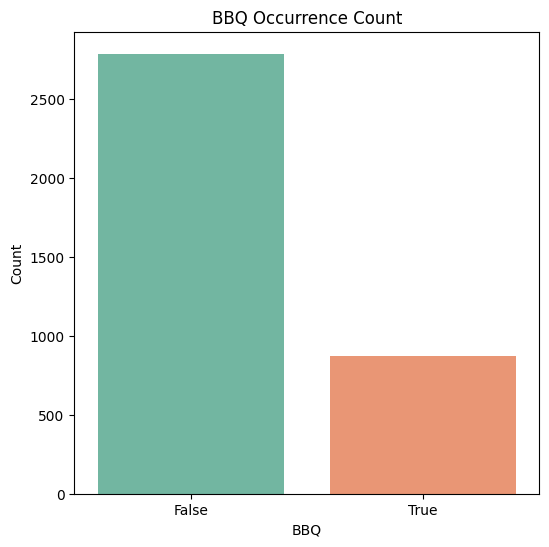

In [244]:
plt.figure(figsize=(6, 6))
sns.countplot(data= city_data, x='BBQ', palette='Set2')
plt.title('BBQ Occurrence Count')
plt.xlabel('BBQ')
plt.ylabel('Count')
plt.show()

<ipython-input-245-563d97622138>:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=city_data, x=precipitation_column, hue='BBQ', fill=True, ax=axs[1, 0])


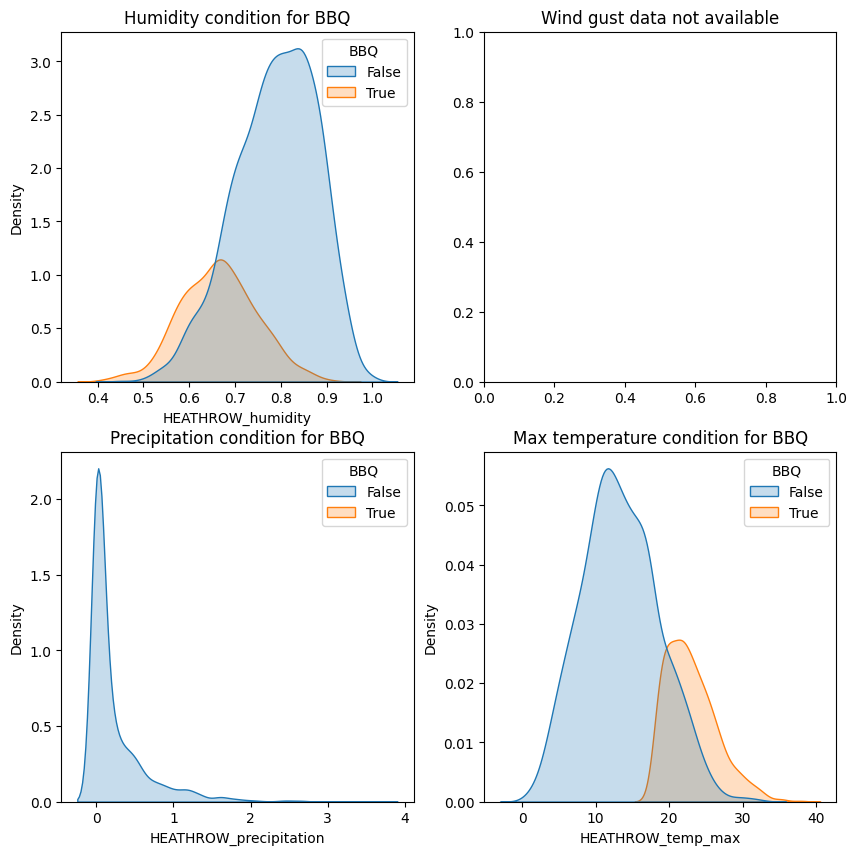

In [245]:
# Create subplots for KDE plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot Humidity condition for BBQ
humidity_column = next((col for col in city_columns if 'humidity' in col.lower()), None)
if humidity_column:
    sns.kdeplot(data=city_data, x=humidity_column, hue='BBQ', fill=True, ax=axs[0, 0])
    axs[0, 0].set_title('Humidity condition for BBQ')
else:
    axs[0, 0].set_title('Humidity data not available')

# Plot Wind gust condition for BBQ
wind_gust_column = next((col for col in city_columns if 'wind_gust' in col.lower()), None)
if wind_gust_column:
    sns.kdeplot(data=city_data, x=wind_gust_column, hue='BBQ', fill=True, ax=axs[0, 1])
    axs[0, 1].set_title('Wind gust condition for BBQ')
else:
    axs[0, 1].set_title('Wind gust data not available')

# Plot Precipitation condition for BBQ
precipitation_column = next((col for col in city_columns if 'precipitation' in col.lower()), None)
if precipitation_column:
    sns.kdeplot(data=city_data, x=precipitation_column, hue='BBQ', fill=True, ax=axs[1, 0])
    axs[1, 0].set_title('Precipitation condition for BBQ')
else:
    axs[1, 0].set_title('Precipitation data not available')

# Plot Max temperature condition for BBQ
temp_max_column = next((col for col in city_columns if 'temp_max' in col.lower()), None)
if temp_max_column:
    sns.kdeplot(data=city_data, x=temp_max_column, hue='BBQ', fill=True, ax=axs[1, 1])
    axs[1, 1].set_title('Max temperature condition for BBQ')
else:
    axs[1, 1].set_title('Max temperature data not available')

# Show the plot
plt.show()


#### Distribution plots

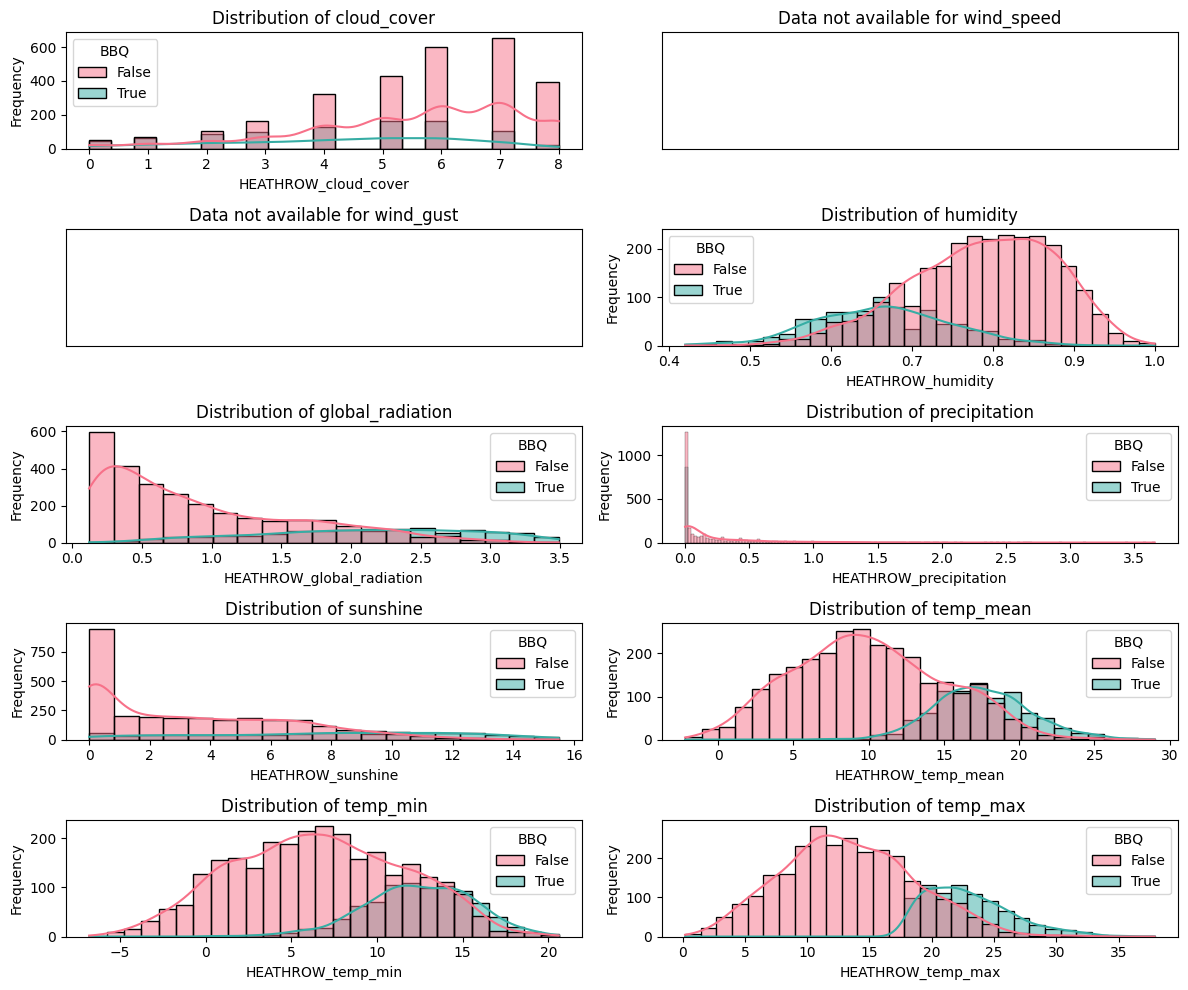

In [246]:
# Distribution plots for weather variables
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

variables = ['cloud_cover', 'wind_speed', 'wind_gust',
             'humidity', 'global_radiation', 'precipitation',
             'sunshine', 'temp_mean', 'temp_min', 'temp_max']

for i, var in enumerate(variables, 1):
    column_name = next((col for col in city_columns if var in col.lower()), None)
    if column_name:
        plt.subplot(5, 2, i)
        sns.histplot(data=city_data, x=column_name, kde=True, hue='BBQ', palette='husl')
        plt.title(f'Distribution of {var}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
    else:
        plt.subplot(5, 2, i)
        plt.title(f'Data not available for {var}')
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()


#### Piechart

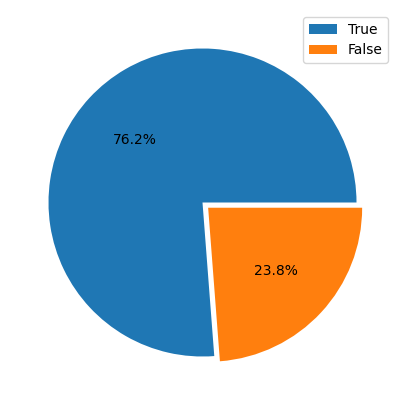

In [247]:
#True vs False: condition for having a nice weather
plt.figure(figsize = (5,5))
explode = [0,0.05]
plt.pie(city_data['BBQ'].value_counts(),
        explode=explode, autopct='%.1f%%');
plt.legend(['True', 'False']);
plt.show()

##**Data Preperation**

In [248]:
##mapping the true value to 1 and false to 0

city_data['BBQ'] = city_data['BBQ'].map({True:1, False:0});

<ipython-input-248-341cdb22a1e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['BBQ'] = city_data['BBQ'].map({True:1, False:0});


In [249]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [250]:
X = city_data.drop(['DATE','BBQ'], axis = 1)
y = city_data['BBQ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 28)
len(X_train), len(X_test)

(2923, 731)

##**ANN Model**

---




1. **Model Setup**: We define a neural network model with dropout regularization. It consists of an input layer, two hidden layers with ReLU activation functions, each followed by a dropout layer with a dropout rate of 0.2, and an output layer with a sigmoid activation function.

2. **Compilation**: The model is compiled with the binary cross-entropy loss function, Adam optimizer, and accuracy metric.

3. **Training**: The model is trained using the training data over 100 epochs, with early stopping implemented to prevent overfitting. Early stopping monitors the validation loss and stops training if it does not improve for 5 consecutive epochs, restoring the best weights.

4. **Evaluation**: After training, the model is evaluated using the test data to calculate the test loss and accuracy.

5. **Visualization**: The training progress is visualized by plotting the training and validation loss over epochs. Additionally, the training and validation accuracy are plotted to monitor model performance.

In [251]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with dropout regularization
##To avoid the overfitting i have added dropout layer of 20% and also used earlystopping for training
model = Sequential([
    Dense(X_train.shape[1], activation="relu"),
    Dropout(0.2),
    Dense(X_train.shape[1] // 2, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100
92/92 [==============================] - 2s 6ms/step - loss: 0.6984 - accuracy: 0.7130 - val_loss: 0.5523 - val_accuracy: 0.7784
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 0.5791 - accuracy: 0.7588 - val_loss: 0.4685 - val_accuracy: 0.8140
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.5322 - accuracy: 0.7633 - val_loss: 0.4240 - val_accuracy: 0.8399
Epoch 4/100
92/92 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.7800 - val_loss: 0.3935 - val_accuracy: 0.8440
Epoch 5/100
92/92 [==============================] - 0s 5ms/step - loss: 0.4628 - accuracy: 0.7841 - val_loss: 0.3757 - val_accuracy: 0.8454
Epoch 6/100
92/92 [==============================] - 0s 4ms/step - loss: 0.4453 - accuracy: 0.7961 - val_loss: 0.3570 - val_accuracy: 0.8495
Epoch 7/100
92/92 [==============================] - 0s 4ms/step - loss: 0.4378 - accuracy: 0.7930 - val_loss: 0.3490 - val_accuracy: 0.8632
Epoch 8/100
9

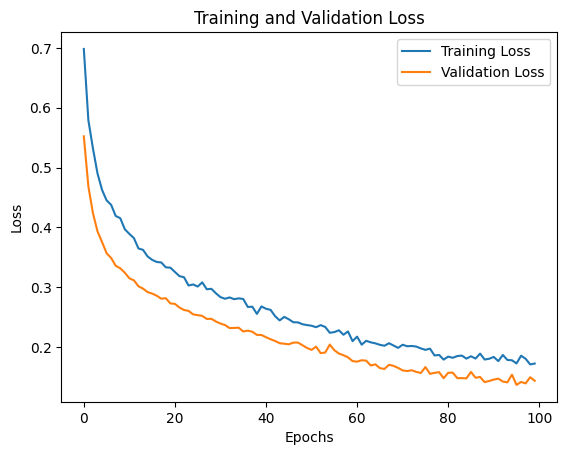

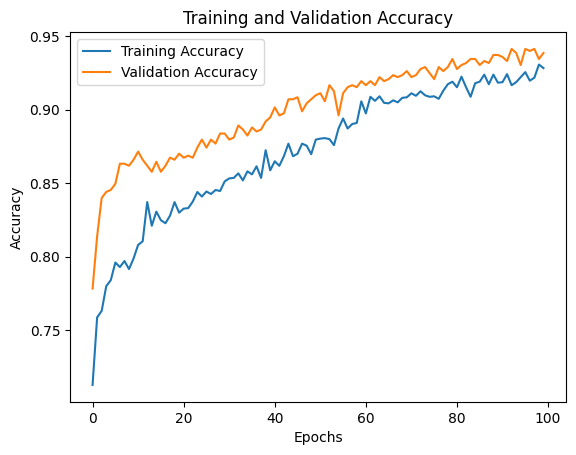

In [252]:
# Create DataFrame from history
history_df = pd.DataFrame(history.history)

# Plot training and validation loss
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [253]:
predictions = np.round(model.predict(X_test))
print(classification_report(y_test,predictions))

23/23 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       566
           1       0.80      0.96      0.88       165

    accuracy                           0.94       731
   macro avg       0.90      0.95      0.92       731
weighted avg       0.95      0.94      0.94       731



In [254]:
ann_acc = accuracy_score(y_test, predictions)
ann_acc

0.9384404924760602

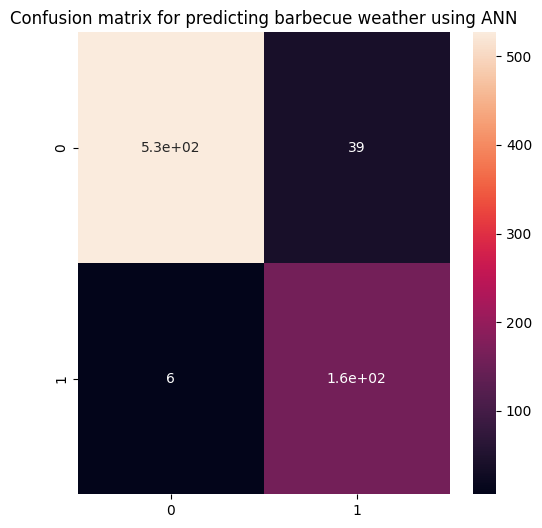

In [255]:
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title('Confusion matrix for predicting barbecue weather using ANN');

In [256]:
##save the model
model.save(f"barbecue_weather_ann_{city}.h5")
print("Model saved successfully!")

Model saved successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **CNN Model**

1. **Model Setup**: We define a neural network model with dropout regularization. It consists of a reshaping layer to match the input shape, a 1D convolutional layer with 10 filters and a kernel size of 2, followed by a flattening layer. After flattening, a dropout layer with a dropout rate of 0.2 is added to prevent overfitting. Finally, there is an output dense layer with a sigmoid activation function.

2. **Compilation**: The model is compiled with the binary cross-entropy loss function, Adam optimizer, and accuracy metric.

3. **Training**: The model can be trained using the training data. You can specify the number of epochs and validation data to train the model effectively.

4. **Evaluation**: After training, the model's performance can be evaluated using test data to calculate the test loss and accuracy.

5. **Visualization**: The training progress can be visualized by plotting the training and validation loss over epochs. Additionally, the training and validation accuracy can be plotted to monitor model performance.

In [257]:
X_train.shape, X_test.shape

((2923, 9), (731, 9))

In [272]:
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, Reshape
from tensorflow.keras.models import Sequential

# Define the model with Dropout regularization
model_2 = Sequential([
    Reshape((1, X_train.shape[1], 1)),
    Conv1D(filters=10, kernel_size=2, activation='relu', input_shape=(1, X_train.shape[1], 1)),
    Flatten(),
    Dropout(0.2),  # Add Dropout layer with dropout rate of 0.2
    Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


<Axes: >

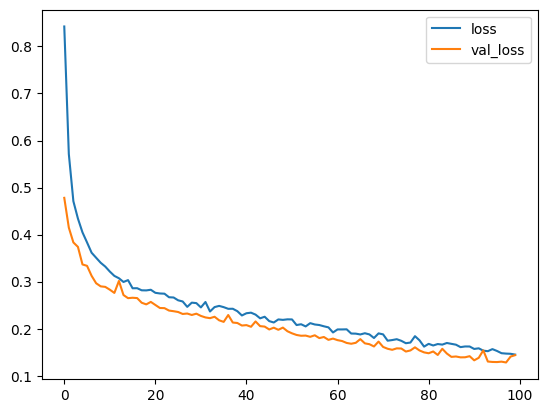

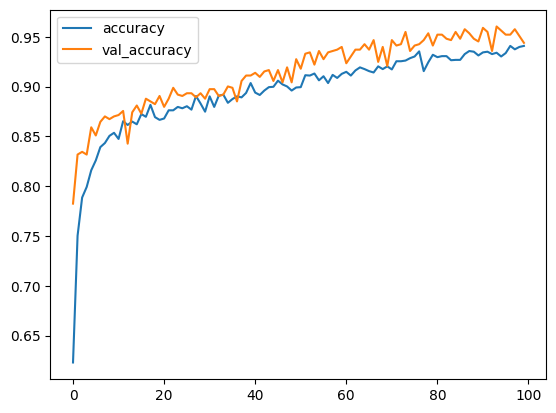

In [259]:
# Train the model
history_2 = model_2.fit(x=X_train,
                        y=y_train,
                        epochs=100,
                        validation_data=(X_test, y_test),
                        verbose=0)

# Evaluate the model
model_2_loss_acc = pd.DataFrame(history_2.history)
model_2_loss_acc[['loss', 'val_loss']].plot()
model_2_loss_acc[['accuracy', 'val_accuracy']].plot()


In [260]:
pred_2 = np.round(model_2.predict(X_test))
print(classification_report(y_test,pred_2))

23/23 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       566
           1       0.96      0.79      0.86       165

    accuracy                           0.94       731
   macro avg       0.95      0.89      0.91       731
weighted avg       0.94      0.94      0.94       731



In [261]:
cnn_acc = accuracy_score(y_test, pred_2)
cnn_acc

0.9439124487004104

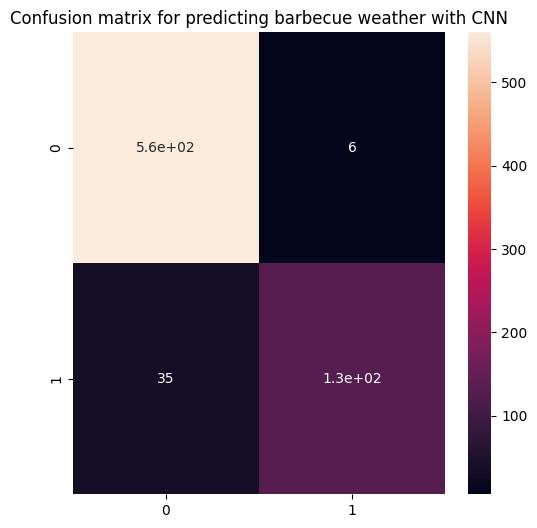

In [262]:
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_2), annot=True)
plt.title('Confusion matrix for predicting barbecue weather with CNN');

In [263]:
model.save(f"barbecue_weather_cnn_{city}.h5")
print("Model saved successfully!")

Model saved successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **CONVLSTM Model**

1. **Model Setup**: We define a neural network model with ConvLSTM2D layer followed by a flattening layer. The ConvLSTM2D layer has 64 filters, a kernel size of (1, 1), and uses the ReLU activation function. The input shape is specified as (X_train.shape[1], 1, 1, 1).

2. **Compilation**: The model is compiled with the binary cross-entropy loss function, Adam optimizer, and accuracy metric.

3. **Training**: The model can be trained using the training data. You can specify the number of epochs and validation data to train the model effectively.

4. **Evaluation**: After training, the model's performance can be evaluated using test data to calculate the test loss and accuracy.

5. **Visualization**: The training progress can be visualized by plotting the training and validation loss over epochs. Additionally, the training and validation accuracy can be plotted to monitor model performance.

In [264]:
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# Define the model with Dropout regularization
model_3 = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1, 1)),
    Flatten(),
    Dropout(0.5),  # Add Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##Train the model to with early callback to sttop the overfitting


In [265]:
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=False)

# Train the model with callback
history_3 = model_3.fit(x=X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1, 1, 1)),
                        y=y_train,
                        epochs=100,
                        validation_data=(X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1, 1, 1)), y_test),
                        callbacks=[early_stopping],
                        verbose=0)

Epoch 59: early stopping


In [266]:
# Convert X_test DataFrame to numpy array
X_test_array = X_test.to_numpy()

# Evaluate the model
pred_3 = np.round(model_3.predict(X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1, 1, 1))))
print(classification_report(y_test, pred_3))


23/23 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       566
           1       0.90      0.93      0.92       165

    accuracy                           0.96       731
   macro avg       0.94      0.95      0.95       731
weighted avg       0.96      0.96      0.96       731



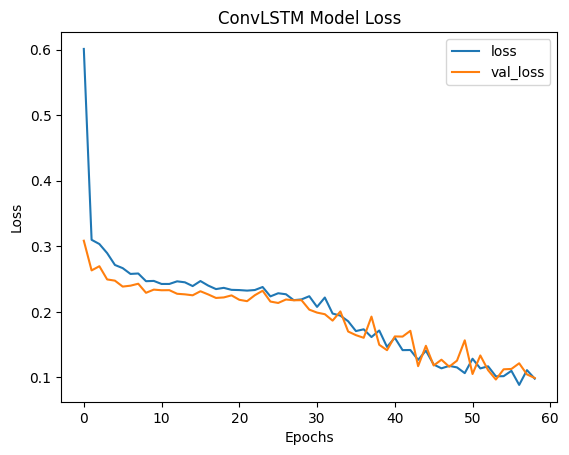

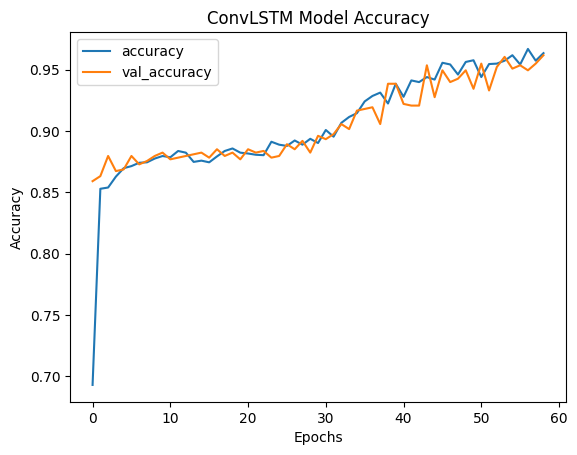

In [267]:
# Visualize the training progress for ConvLSTM
model3_loss_acc = pd.DataFrame(history_3.history)
model3_loss_acc[['loss', 'val_loss']].plot()
plt.title('ConvLSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

model3_loss_acc[['accuracy', 'val_accuracy']].plot()
plt.title('ConvLSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [268]:
convlstm_acc= accuracy_score(y_test, pred_3)
print("ConvLSTM Accuracy:", convlstm_acc)


ConvLSTM Accuracy: 0.9616963064295485


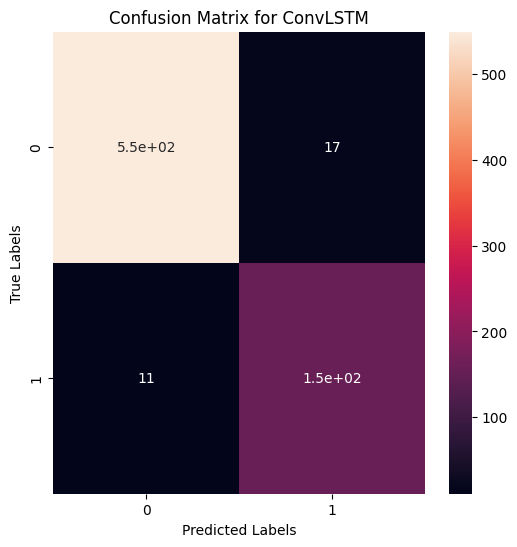

In [269]:


# Visualize the confusion matrix for ConvLSTM
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, pred_3), annot=True)
plt.title('Confusion Matrix for ConvLSTM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [270]:
model.save(f"barbecue_weather_lstm_{city}.h5")

print("Model saved successfully!")

Model saved successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##**ANN vs CNN vs CONVLSTM**

---



<ipython-input-271-5537935cd938>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Methods', y='Accuracy',
<ipython-input-271-5537935cd938>:14: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x='Methods', y='Accuracy',


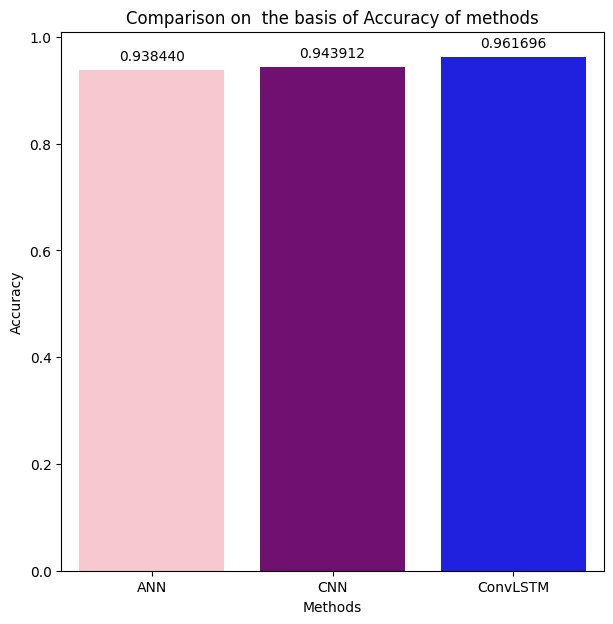

In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame
d = {'Methods': ['ANN', 'CNN', 'ConvLSTM'], 'Accuracy': [ann_acc, cnn_acc, convlstm_acc]}
dfc = pd.DataFrame(data=d)

# Specify custom colors
custom_palette = ["pink", "purple", "blue"]

# Plot
plt.figure(figsize=(7, 7))
ax = sns.barplot(x='Methods', y='Accuracy',
                 data=dfc,
                 palette=custom_palette,
                 errwidth=0)

# Display exact values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.6f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Comparison on  the basis of Accuracy of methods')
plt.show()
